In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as lab
from IPython.display import display
from sklearn.cluster import KMeans

# Data Ingest

In [2]:
scooter_data = pd.read_csv("2019-XTern- Work Sample Assessment Data Science-DS.csv")
display(scooter_data)

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4
5,5,0.899680,0.790893,2
6,6,0.873765,0.808707,4
7,7,0.913476,0.789742,5
8,8,0.915256,0.790685,4
9,9,0.916273,0.785860,5


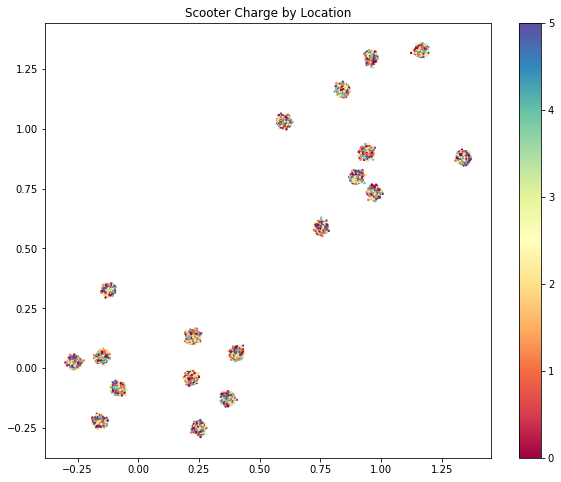

In [3]:
fig = plt.figure(figsize=(10, 8))
plt.title("Scooter Charge by Location")
plt.scatter(scooter_data.xcoordinate, scooter_data.ycoordinate, 
            c=scooter_data.power_level, cmap=plt.get_cmap("Spectral"),
            s=2)
plt.colorbar()
fig.patch.set_facecolor("white")  # Set background to white for easier viewing on dark theme editors
plt.show()

# Identifying Popular Locations

## Classification by Location

In order to determine the most popular location, obviously the locations must first be determined.
From the graph above, the scooters are clearly divided into 19 distinct groups.

Due to the quantity and quality of data to classify, this problem would be impractical to solve by hand, 
but trivial to automate. Due to the fact that there are not a large number of clusters, 
and because the size of each cluster is approximately identical, it is an excellent candidate for 
K-Means classification.

In [4]:
# Convert pandas data frame to numpy vector array for classification
data = np.asarray((scooter_data.xcoordinate, scooter_data.ycoordinate)).T 
# Estimate groups using KMeans algorithm
estimator = KMeans(n_clusters=19)
estimator.fit(data)
scooter_data.insert(len(scooter_data.columns), "group", estimator.labels_, True)

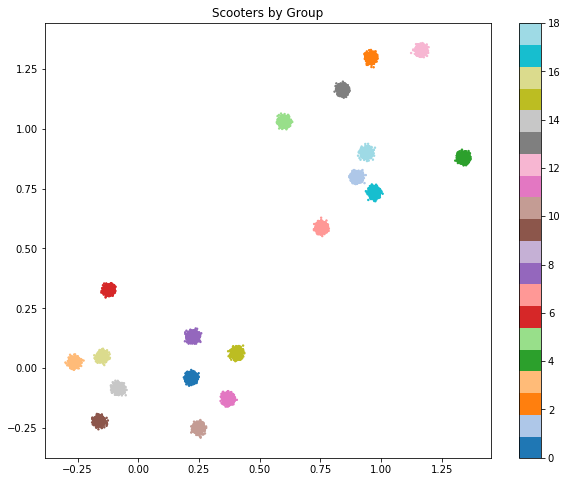

In [17]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(scooter_data.xcoordinate, scooter_data.ycoordinate, 
            c=scooter_data.group, cmap=plt.get_cmap("tab20"), 
            s=2)
plt.title("Scooters by Group")
plt.colorbar()
fig.patch.set_facecolor("white")
plt.show()

The graph above shows that the KMeans estimator was able to sucessfully 
classify each scooter based on the cluster it is closest to with good boundaries.

In [70]:
scooter_groups = scooter_data.groupby("group")
group_stats = [None]*19
for group in range(19):
    scooter_group = scooter_groups.get_group(group)
    group_stats[group] = dict()
    group_stats[group]["group_id"] = group
    group_stats[group]["scooter_count"] = len(scooter_group.index)
    group_stats[group]["xcoordinate"] = scooter_group.xcoordinate.mean()
    group_stats[group]["ycoordinate"] = scooter_group.ycoordinate.mean()
    for power_level in range(6):
        group_stats[group][f"power_level_{power_level}"] = \
            len(scooter_group[scooter_group.power_level == power_level].index)
group_data = pd.DataFrame(group_stats)
sorted_group_data_popular = group_data.sort_values("scooter_count", ascending=False)
display(group_data)

,group_id,power_level_0,power_level_1,power_level_2,power_level_3,power_level_4,power_level_5,scooter_count,xcoordinate,ycoordinate
0,0,260,275,273,273,266,256,1603,0.217946,-0.040843
1,1,242,212,200,228,223,208,1313,0.901277,0.797373
2,2,214,234,222,248,207,241,1366,0.958189,1.295719
3,3,211,226,216,229,239,212,1333,-0.262578,0.024090
4,4,282,232,234,250,241,278,1517,1.341285,0.877401
5,5,188,198,169,170,170,220,1115,0.602296,1.029371
6,6,166,161,192,146,146,160,971,-0.121440,0.327515
7,7,275,255,222,234,231,244,1461,0.754606,0.584966
8,8,371,365,364,341,364,400,2205,0.225560,0.131448
9,9,173,167,154,163,155,176,988,-0.160730,-0.221263


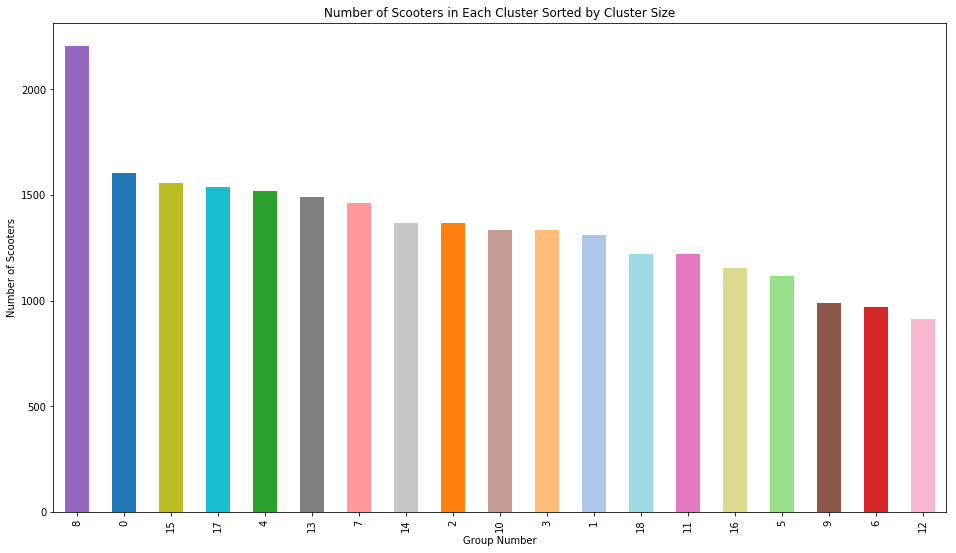

In [66]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.title("Number of Scooters in Each Cluster Sorted by Cluster Size")
plt.xlabel("Group Number")
plt.ylabel("Number of Scooters")
# Use same color space as in KMeans graph
sorted_group_data_popular.scooter_count.plot.bar(fig=fig, ax=ax,
                                                 color=[lab.cm.tab20(np.linspace(0, 1, 19)[id]) for id in
                                                        sorted_group_data_popular.group_id])
fig.patch.set_facecolor("white")
plt.show()


The chart above clearly illustrates the most popular destinations. The group number and color 
is the same as above in the initial classification chart, and the location of each groups center 
is provided in the table above, so groups can be easily mapped to their locations.

As shown, the most popular location for scooters is the cluster centered at X = 0.225560, Y = 0.131448.



# Determining Optimal Charging Strategy

In [22]:
group_power_levels = [None] * 19
for group in range(19):
    group_data = scooter_groups.get_group(group)
    power_levels = {f"Power Level {power}":
                        len(group_data[group_data.power_level == power].index)
                    for power in range(6)
                    }
    group_power_levels[group] = power_levels
power_data = pd.DataFrame(group_power_levels)

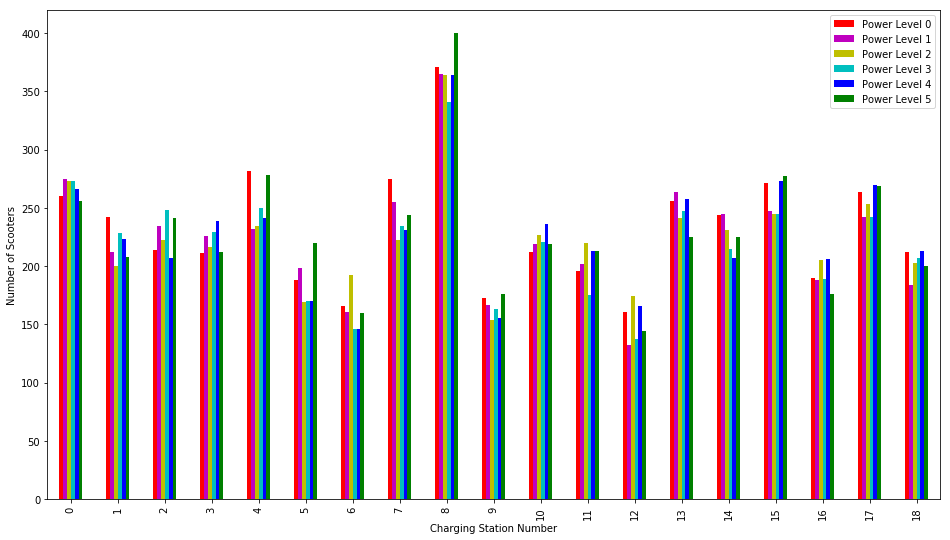

In [23]:
fig, ax = plt.subplots()
plt.xlabel("Charging Station Number")
plt.ylabel("Number of Scooters")
subplot = power_data.plot.bar(fig=fig, ax=ax, color="rmycbg", figsize=(16, 9))
fig.patch.set_facecolor("white")

## Worst Case Scenario

If only one scooter were allowed to charge at any time, calculating the number of scooters 
at each power level and multiplying it by the time it takes to charge to full yields 
the total time it would take to charge all the scooters to full in the worst case 
assuming that the scooters are not used at all during the charging period.

It is also assumed here that since it takes 5 hours for the scooter to charge from 
power level 0 to 5, it always takes one hour to increase the power level by one.


In [67]:
worst_case_operation_time_cost = 0
for power_level in range(5):
    scooters = len(scooter_data[scooter_data.power_level == power_level].index)
    operation_time_cost = scooters * (5 - power_level)
    worst_case_operation_time_cost += operation_time_cost
    print(f"There are {scooters} scooters at power level {power_level} which would take {operation_time_cost} hours to charge to full")
print(f"\nThe total time to charge all scooters in the worst case is {worst_case_operation_time_cost} hours")

There are 4388 scooters at power level 0 which would take 21940 hours to charge to full
There are 4248 scooters at power level 1 which would take 16992 hours to charge to full
There are 4245 scooters at power level 2 which would take 12735 hours to charge to full
There are 4160 scooters at power level 3 which would take 8320 hours to charge to full
There are 4284 scooters at power level 4 which would take 4284 hours to charge to full

The total time to charge all scooters in the worst case is 64271 hours


## Shortest Task First (No Bus, Scooters Stationary)

If there are limited resources available, we know that the most effective way to process the most of
a large number of tasks as quickly as possible is the shortest-task-first scheduling algorithm.

Since we assume that one power level takes one hour to charge, the scooters with the highest battery
should always be charged first.

Now, if no parallelization takes place then the worst case total time cannot be improved upon, so the best
that can be done is to increase the rate at which the number of scooters at full charge increases. That is
not the goal of this inquiry, so for the sake of this argument, we will assume that each cluster in the data 
represents a charging station that is capable of charging 100 scooters at a time. Note, however, that this 
alone only yields at best a constant factor improvement of 1900 in the time required, i.e., it will still take
over 33 hours to charge all of the scooters with the added chargers. The actual benefit will be less since the 
scooters are not evenly distributed among the charging stations.

Also note that this assumption means that the system is overloaded so the shortest-task-first scheduling algorithm 
provides no benefit to total time over any other algorithm. It is still worth proceeding, however, since it 
provides the highest initial rate of fully charged scooters and will begin to have real benefits once we examine 
the dynamic case rather than this simple static case.

In [171]:
still_charging = True
time = 0
labels = ["time"] + [f"group_{group}" for group in range(19)]
shortest_task_data = group_data.copy()
charging_data = pd.DataFrame(
    [[0] + [total - charged for total, charged in 
                 zip(shortest_task_data.scooter_count.values, 
                     shortest_task_data.power_level_5.values)
                 ]],
    columns=labels
)
while any((shortest_task_data.power_level_4.any(), 
           shortest_task_data.power_level_3.any(),
           shortest_task_data.power_level_2.any(), 
           shortest_task_data.power_level_1.any(), 
           shortest_task_data.power_level_0.any())):
    time += 1
    for group in range(19):
        chargers_left = 100
        for level in reversed(range(5)):
            chargers_used = min(chargers_left, shortest_task_data[f"power_level_{level}"][group])
            chargers_left -= chargers_used
            shortest_task_data.at[group, f"power_level_{level}"] -= chargers_used
            shortest_task_data.at[group, f"power_level_{level + 1}"] += chargers_used
    charging_data = pd.concat([charging_data, 
               pd.DataFrame([[time] + [total - charged for total, charged in zip(shortest_task_data.scooter_count.values, shortest_task_data.power_level_5.values)]],
                            columns=labels)], 
              ignore_index=True)
display(charging_data)

,time,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,group_11,group_12,group_13,group_14,group_15,group_16,group_17,group_18
0,0,1347,1105,1125,1121,1239,895,811,1217,1805,812,1115,1006,770,1266,1142,1281,978,1271,1019
1,1,1247,1005,1025,1021,1139,795,711,1117,1705,712,1015,906,670,1166,1042,1181,878,1171,919
2,2,1147,905,925,921,1039,725,665,1017,1605,657,915,806,604,1066,942,1081,778,1071,819
3,3,1081,882,918,882,998,695,611,986,1505,612,879,793,570,1008,935,1008,772,1001,806
4,4,1047,805,825,821,939,625,565,917,1441,557,815,706,504,966,842,981,678,971,719
5,5,981,782,818,782,898,595,519,886,1405,512,779,693,470,908,835,908,672,901,706
6,6,947,705,725,721,839,555,511,817,1341,494,715,618,467,866,742,881,583,871,619
7,7,881,682,718,682,798,525,465,786,1305,457,679,606,404,808,735,808,578,801,606
8,8,847,654,670,653,748,495,419,752,1241,412,658,593,370,766,720,781,572,771,599
9,9,808,605,625,621,739,455,411,717,1205,394,615,518,367,761,642,763,483,759,519


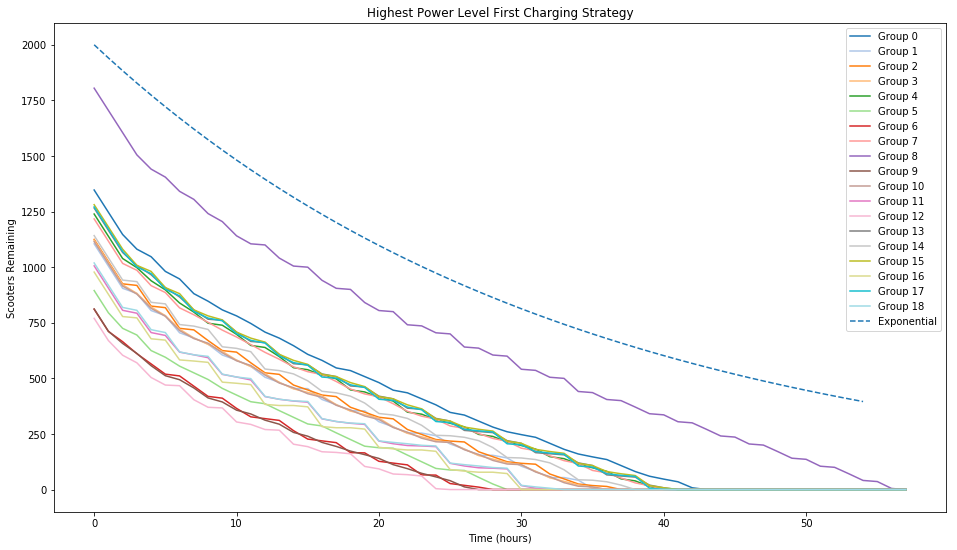

In [207]:
fig = plt.figure(figsize=(16, 9))
plt.title("Highest Power Level First Charging Strategy")
plt.ylabel("Scooters Remaining")
plt.xlabel("Time (hours)")
for group in range(19):
    plt.plot(charging_data.time, charging_data[f"group_{group}"], c=lab.cm.tab20(np.linspace(0, 1, 19)[group]), label=f"Group {group}")
x = np.arange(0, 55)
k = 0.03
plt.plot(x, 2000 * np.exp(-k*x), "--", label="Exponential")
plt.legend()
fig.patch.set_facecolor("white")
plt.show()